# TP 2. PARTIE 2. PDA - QDA. k-NN

In [1]:
print("Hello world!")

Hello world!


## Plan :

   [- LDA-QDA](#1)
   
   [- Dataset Vowel](#2)
   
   [- k-NN](#3)   

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns
import os


# 1. LDA-QDA


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [5]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Figures',
 'README',
 'TP2_PARTIE_1_Etudiant.ipynb',
 'TP2_PARTIE_2_Etudiant.ipynb',
 'vowel.test.csv',
 'vowel.train.csv']

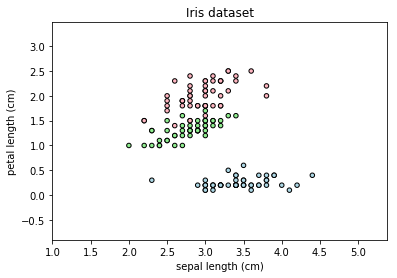

In [7]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.savefig("./Figures/sklearn_examples_iris")

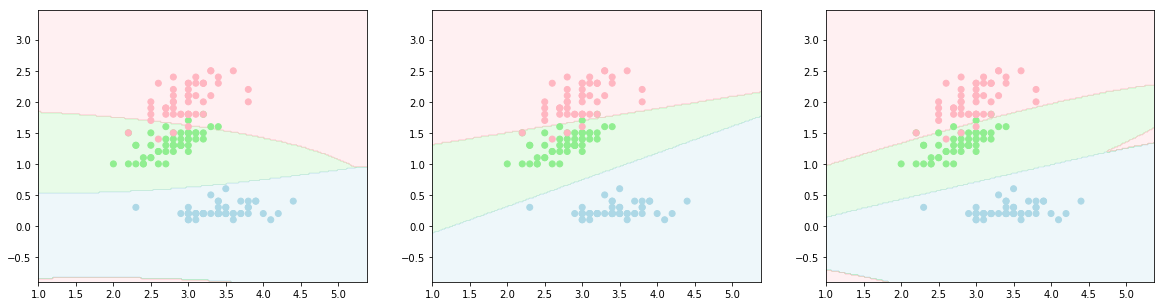

In [8]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.2)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [9]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

48400

In [10]:
np.c_[xx.ravel(), yy.ravel()].shape

(48400, 2)

In [11]:
Z

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [12]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

48400
48400


# 2. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [41]:
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [14]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


Répéter l'analyse faite sur le dataset iris avec les données vowel.

In [33]:
print(train.shape)
print(test.shape)

(528, 11)
(462, 11)


On a 528 observations pour le train et 462 pour le test de 11 variables chacune.

In [38]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

On a bien 11 variables pour le train.

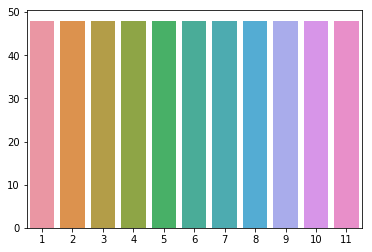

In [25]:
sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])

On a 48 observations pour chacune des 11 classes de l'echantillon train.

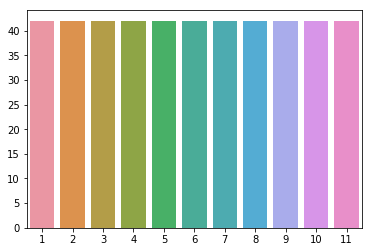

In [26]:
sns.barplot(np.unique(test['y']),test.groupby('y').count().values[:,0])

On a 42 observations pour chacune des 11 classes de l'echantillon test.

In [27]:
y_train= train.values[:,0]
x_train= train.values[:,1:]
print(x_train.shape)

(528, 10)


In [28]:
y_test= test.values[:,0]
x_test= test.values[:,1:]
print(x_test.shape)

(462, 10)


On enleve la variable qualitative renseignant la classe pour mieux traiter le problème de classification et n'avoir que des variables quantitatives.

# Machine learning


In [42]:
names = ["Naive Bayes","LDA","QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Naive bayes

In [30]:
NB=GaussianNB()
NB_fit=NB.fit(X=x_train,y=y_train)
print("le score sur le train est", ("%.3f" % accuracy_score(NB_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(NB_fit.predict(x_test),y_test)))

le score sur le train est 0.720
le score sur le test est 0.461


On a donc, grâce à la méthode naive bayes 72% d'observations du train qui sont bien classées et seulement 46% d'observations du test qui sont bien classées.


# LDA

In [31]:
LDA= LinearDiscriminantAnalysis()
LDA_fit=LDA.fit(X=x_train,y=y_train)
print("le score sur le train est", ("%.3f" % accuracy_score(LDA_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(LDA_fit.predict(x_test),y_test)))

le score sur le train est 0.684
le score sur le test est 0.444


Quand à l'analyse discriminante linéaire (LDA), elle est moins précise que la méthode naive bayes, car ici nous avons pour l'echantillion train seulement 68.4% d'observations bien classées (contrairement au 72% pour NB) et pour l'échantillon test 44% (46% pour NB).

# QDA

In [32]:
QDA= QuadraticDiscriminantAnalysis()
QDA_fit=QDA.fit(X=x_train,y=y_train)
print("le score sur le train est", ("%.3f" % accuracy_score(QDA_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(QDA_fit.predict(x_test),y_test)))

le score sur le train est 0.989
le score sur le test est 0.472


L'analyse discriminante quadratique est la méthode la plus précise vu jusque la.
En effet nous avons 99% d'observations du train et 47% d'observations du test bien classées.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. k-NN

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

Utiliser l'algo k-NN pour différents k et comparez ses performances avec les méthodes précédentes.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
acc_train=[]
acc_test=[]
for k in np.arange(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_fit = knn.fit(X=x_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(x_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(x_test),y_test))



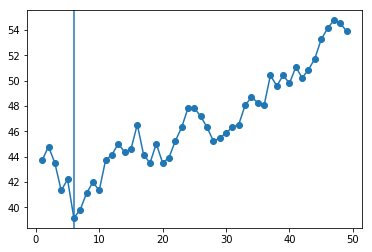

In [62]:
errors = []

for k in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=k)

    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))

plt.plot(range(1,50), errors, 'o-')
plt.axvline(np.arange(1,50)[5],label="best k en test")
plt.show()

In [59]:
k_hat=np.argmax(acc_test)
print("les scores train/ test" , ("%.3f" % acc_train[k_hat]),("%.3f" % acc_test[k_hat]))


les scores train/ test 0.977 0.608


Le meilleur classifieur est celui pour lequel k=k_hat=5. En effet c'est celui pour lesquelles les données sont le mieux classées et pour lequel l'erreur est la plus faible (en dessous de 40%).


La méthode 5-NN est donc la meilleure méthode utilisé car nous avons un poucentage de 97.7% d'observations bien classées pour l'echantillon train et 60.8% pour l'echantillon test, ce qui est nettement mieux car nous étions autour de 45% pour ce dernier.

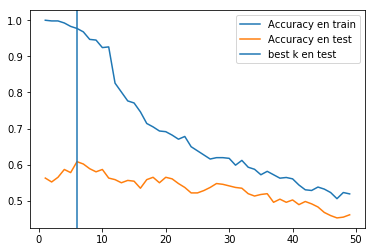

In [52]:

plt.plot(np.arange(1,50),acc_train,label="Accuracy en train")
plt.plot(np.arange(1,50),acc_test,label="Accuracy en test")
plt.axvline(np.arange(1,50)[k_hat],label="best k en test")
plt.legend()



Ce graphique confirme nos dire, on constate donc que la meilleure classification est celle pour laquelle k=5.
On retrouve donc les 97.7% d'observations du train bien classées et les 60.8% observations du test bien classées.

On constate donc qu'ici la meilleur méthode pour la classification est celle des k plus proches voisins , et que celui ci est la plus précis pour un k=5.